In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime, date, time, timezone
import datetime as dt

In [2]:
data = pd.read_csv("../data/preprocessed_database_telegram.csv")
data = data.copy()

# Data Analysis

In [3]:
data.tail(30)

,date,station_key,text,station name,lines,area,latitude,longitude
60332,2023-08-29 17:08:00,hermannplatz,4x hermannplatz u7 station,Hermannplatz,"U7, U8",Neukölln,52.487222,13.424722
60333,2023-08-29 18:11:00,frankfurter allee,16 frankfurter allee frau fette boots von conv...,Frankfurter Allee,"U5, S41, S42, S8, S85",Friedrichshain,52.515000,13.474444
60334,2023-08-30 05:30:00,hermannstr,m10 richtung warschauer gerade husemannstr,Hermannstraße,"U8, S41, S42, S45, S46, S47",Neukölln,52.467500,13.431250
60335,2023-08-30 06:55:00,warschauer str,m10 winsstr direction warschauer,Warschauer Straße,"U1, U3, S3, S5, S7, S75, S9",Friedrichshain,52.505694,13.449722
60336,2023-08-30 07:04:00,lichtenberg,3 blue vest controllers at su lichtenberg u ba...,Lichtenberg,"U5, S5, S7, S75",Lichtenberg,52.510556,13.496389
60337,2023-08-30 07:15:00,gesundbrunnen,u8 gesundbrunnen steig 4 kontrollis,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250
60338,2023-08-30 07:25:00,hohenzollerndamm,s46 hohenzollerndamm 2 pers min,Hohenzollerndamm,"S41, S42, S46",Halensee,52.488611,13.300278
60339,2023-08-30 07:35:00,halensee,gleiche lockige steigt bei halensee s42,Halensee,"S41, S42, S46",Halensee,52.496111,13.290556
60340,2023-08-30 07:39:00,pankstr,u8 richtung hermann 2 jungs gerade pankstr,Pankstraße,U8,Gesundbrunnen,52.552222,13.381389
60341,2023-08-30 07:44:00,alex,3 blauen u5 alex richtung hbf,Alexanderplatz,"U2, U5, U8, S3, S5, S7, S9",Mitte,52.521389,13.412639


In [4]:
data['date'] = pd.to_datetime(data["date"])

In [5]:
data = data.set_index("date")

## Looking at the counts for area, line, stations

In [6]:
data["area"].value_counts()

area
Mitte                     10136
Kreuzberg                  6630
Neukölln                   5536
Friedrichshain             5172
PrenzlauerBerg             4483
                          ...  
Lehnitz                       3
Blankenfelde-Mahlow           2
Borgsdorf                     2
Fredersdorf-Vogelsdorf        1
Blankenfelde-Mahl             1
Name: count, Length: 94, dtype: int64

In [7]:
data["area"].value_counts().apply(lambda x: x/data["area"].count())

area
Mitte                     0.167920
Kreuzberg                 0.109837
Neukölln                  0.091713
Friedrichshain            0.085683
PrenzlauerBerg            0.074269
                            ...   
Lehnitz                   0.000050
Blankenfelde-Mahlow       0.000033
Borgsdorf                 0.000033
Fredersdorf-Vogelsdorf    0.000017
Blankenfelde-Mahl         0.000017
Name: count, Length: 94, dtype: float64

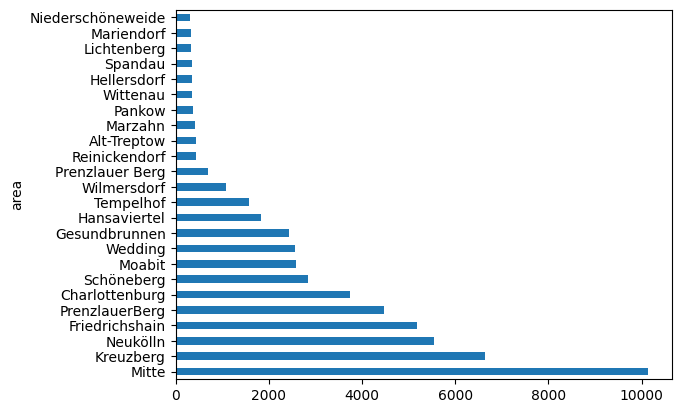

In [8]:
areas = data["area"].value_counts()
areas[areas > 300].plot(kind='barh' );

In [9]:
data["station name"].value_counts()

station name
Alexanderplatz       3177
Warschauer Straße    1703
Hermannplatz         1602
Hermannstraße        1588
Kottbusser Tor       1568
                     ... 
Zepernick               1
Fredersdorf             1
Mahlow                  1
Zwickauer Damm          1
Neu-Westend             1
Name: count, Length: 311, dtype: int64

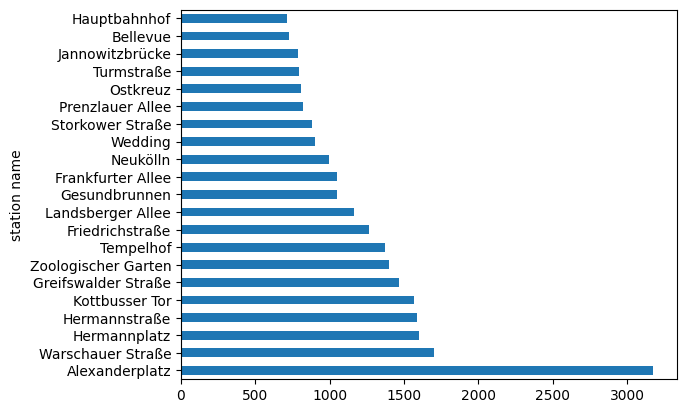

In [10]:
station = data["station name"].value_counts()
station[station > 700].plot(kind='barh');

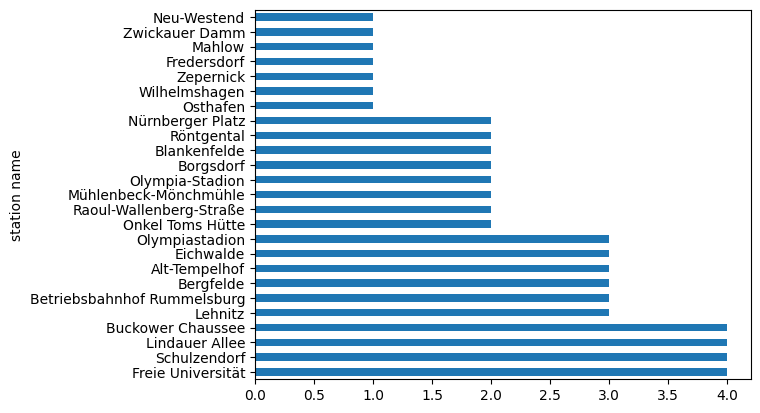

In [11]:
#least frequent
station[station < 5].plot(kind='barh');

In [12]:
lines_counts = []
for entries in data["lines"]:
    lines = entries.split(", ")
    for i in lines:
        lines_counts.append(i)

lines_counts = pd.DataFrame(lines_counts)
counts = lines_counts.value_counts()

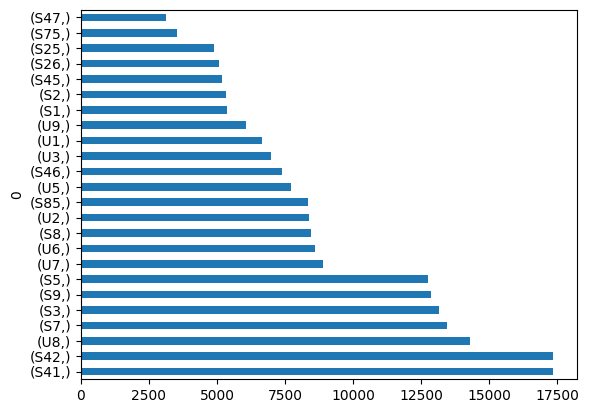

In [13]:
counts[counts > 1000].plot(kind='barh');

## Looking at the counts for Year, Month, Weekday, Hour of the Day

In [14]:
# Year
# Creating a Year column
data["year"] = data.index
data["year"] = pd.to_datetime(data["year"])
data["year"] = data["year"].dt.year

# Months
# Creating a Month column
data["month"] = data.index
data["month"] = pd.to_datetime(data["month"])
data["month"] = data["month"].dt.month
# Naming the months
"""months = {
    1: "January", 2: "February", 3: "March", 
    4: "April", 5: "May", 6: "June", 7: "July", 
    8: "August", 9: "September", 10: "October", 
    11: "November", 12: "December"
}
# Applying the naming
data["month"] = data["month"].map(months)"""

# Weekdays
# Creating a Weekday column
data["weekday"] = data.index
data["weekday"] = pd.to_datetime(data["weekday"])
data["weekday"] = data["weekday"].dt.weekday
# Naming the weekdays
"""weekdays = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
# Applying the naming
data["weekday"] = data["weekday"].map(weekdays)"""

# Hours of the day
data["hour"] = data.index
data["hour"] = pd.to_datetime(data["hour"])
data["hour"] = data["hour"].dt.hour

In [15]:
data

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour
date,,,,,,,,,,,
2018-02-15 12:03:00,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,2018,2,3,12
2018-02-15 18:44:00,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,2018,2,3,18
2018-02-16 07:39:00,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,2018,2,4,7
2018-02-16 12:12:00,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,2018,2,4,12
2018-02-16 14:31:00,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2018,2,4,14
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 11:35:00,kleistpark,bus kleistpark m48 m85 106 187 204,Kleistpark,U7,Schöneberg,52.490556,13.360278,2023,8,2,11
2023-08-30 11:55:00,nordbahnhof,nordbahnhof tram grad m10 draussen station zi...,Nordbahnhof,"S1, S2, S25, S26",Mitte,52.531944,13.387778,2023,8,2,11
2023-08-30 11:55:00,bayerischer platz,u7 bayrischer platz richtung spandau kontrolliert,Bayerischer Platz,"U4, U7",Schöneberg,52.488611,13.340000,2023,8,2,11


In [16]:
data["bins"] = pd.cut(data.index, bins=48529).astype("str")

In [17]:
data['bins'].dtype

dtype('O')

In [18]:
data.resample("h").count().shape

(48529, 12)

In [32]:
count_matrix_area = data.groupby(["bezirk", "bins"])["station_key"].count().unstack().fillna(0)

In [33]:
count_matrix_area

bins,"(2018-02-13 11:31:19.320000, 2018-02-15 13:02:59.923344896]","(2018-02-15 18:02:59.540068864, 2018-02-15 19:02:59.463413504]","(2018-02-16 07:02:58.543551232, 2018-02-16 08:02:58.466896128]","(2018-02-16 12:02:58.160275200, 2018-02-16 13:02:58.083620096]","(2018-02-16 14:02:58.006964992, 2018-02-16 15:02:57.930309632]","(2018-02-16 17:02:57.776999424, 2018-02-16 18:02:57.700344064]","(2018-02-16 20:02:57.547033856, 2018-02-16 21:02:57.470378496]","(2018-02-17 10:02:56.473860864, 2018-02-17 11:02:56.397205760]","(2018-02-19 10:02:52.794411520, 2018-02-19 11:02:52.717756416]","(2018-02-19 11:02:52.717756416, 2018-02-19 12:02:52.641101312]",...,"(2023-08-29 16:01:01.533103872, 2023-08-29 17:01:01.456448768]","(2023-08-29 17:01:01.456448768, 2023-08-29 18:01:01.379793408]","(2023-08-29 18:01:01.379793408, 2023-08-29 19:01:01.303138304]","(2023-08-30 05:01:00.536586240, 2023-08-30 06:01:00.459931136]","(2023-08-30 06:01:00.459931136, 2023-08-30 07:01:00.383276032]","(2023-08-30 07:01:00.383276032, 2023-08-30 08:01:00.306620672]","(2023-08-30 08:01:00.306620672, 2023-08-30 09:01:00.229965568]","(2023-08-30 09:01:00.229965568, 2023-08-30 10:01:00.153310464]","(2023-08-30 10:01:00.153310464, 2023-08-30 11:01:00.076655104]","(2023-08-30 11:01:00.076655104, 2023-08-30 12:01:00]"
bezirk,,,,,,,,,,,,,,,,,,,,,
Brandenburg,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charlottenburg-Wilmersdorf,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Friedrichshain-Kreuzberg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Lichtenberg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Marzahn-Hellersdorf,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mitte,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,3.0
Neukölln,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0
Pankow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Reinickendorf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def get_cluster_count(bezirk, time_bin, timestep_shift, count_matrix):
    return count_matrix.shift(periods = timestep_shift, axis = 1)[time_bin][bezirk]

In [35]:
count_matrix_area.shift(periods = 0, axis = 1)

bins,"(2018-02-13 11:31:19.320000, 2018-02-15 13:02:59.923344896]","(2018-02-15 18:02:59.540068864, 2018-02-15 19:02:59.463413504]","(2018-02-16 07:02:58.543551232, 2018-02-16 08:02:58.466896128]","(2018-02-16 12:02:58.160275200, 2018-02-16 13:02:58.083620096]","(2018-02-16 14:02:58.006964992, 2018-02-16 15:02:57.930309632]","(2018-02-16 17:02:57.776999424, 2018-02-16 18:02:57.700344064]","(2018-02-16 20:02:57.547033856, 2018-02-16 21:02:57.470378496]","(2018-02-17 10:02:56.473860864, 2018-02-17 11:02:56.397205760]","(2018-02-19 10:02:52.794411520, 2018-02-19 11:02:52.717756416]","(2018-02-19 11:02:52.717756416, 2018-02-19 12:02:52.641101312]",...,"(2023-08-29 16:01:01.533103872, 2023-08-29 17:01:01.456448768]","(2023-08-29 17:01:01.456448768, 2023-08-29 18:01:01.379793408]","(2023-08-29 18:01:01.379793408, 2023-08-29 19:01:01.303138304]","(2023-08-30 05:01:00.536586240, 2023-08-30 06:01:00.459931136]","(2023-08-30 06:01:00.459931136, 2023-08-30 07:01:00.383276032]","(2023-08-30 07:01:00.383276032, 2023-08-30 08:01:00.306620672]","(2023-08-30 08:01:00.306620672, 2023-08-30 09:01:00.229965568]","(2023-08-30 09:01:00.229965568, 2023-08-30 10:01:00.153310464]","(2023-08-30 10:01:00.153310464, 2023-08-30 11:01:00.076655104]","(2023-08-30 11:01:00.076655104, 2023-08-30 12:01:00]"
bezirk,,,,,,,,,,,,,,,,,,,,,
Brandenburg,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charlottenburg-Wilmersdorf,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Friedrichshain-Kreuzberg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Lichtenberg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Marzahn-Hellersdorf,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mitte,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,3.0
Neukölln,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0
Pankow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Reinickendorf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def add_clusters_count(df, count_matrix):
    df["target"] = df.apply(lambda df: get_cluster_count(df["bezirk"], df["bins"], -1, count_matrix), axis = 1)
    df["local_0"] = df.apply(lambda df: get_cluster_count(df["bezirk"], df["bins"], 0, count_matrix), axis = 1)
    df["local_1"] = df.apply(lambda df: get_cluster_count(df["bezirk"], df["bins"], 1, count_matrix), axis = 1)
    df["local_2"] = df.apply(lambda df: get_cluster_count(df["bezirk"], df["bins"], 2, count_matrix), axis = 1)
    return df

In [38]:
data["bezirk"]

date
2018-02-15 12:03:00                   Brandenburg
2018-02-15 18:44:00                   Brandenburg
2018-02-16 07:39:00           Marzahn-Hellersdorf
2018-02-16 12:12:00    Charlottenburg-Wilmersdorf
2018-02-16 14:31:00                         Mitte
                                  ...            
2023-08-30 11:35:00          Tempelhof-Schöneberg
2023-08-30 11:55:00                         Mitte
2023-08-30 11:55:00          Tempelhof-Schöneberg
2023-08-30 12:00:00                      Neukölln
2023-08-30 12:01:00    Charlottenburg-Wilmersdorf
Name: bezirk, Length: 60362, dtype: object

In [39]:
df_new = add_clusters_count(data, count_matrix_area)

In [40]:
df_new

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour,bins,bezirk,target,local_0,local_1,local_2
date,,,,,,,,,,,,,,,,,
2018-02-15 12:03:00,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,2018,2,3,12,"(2018-02-13 11:31:19.320000, 2018-02-15 13:02:...",Brandenburg,1.0,1.0,NaN,NaN
2018-02-15 18:44:00,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,2018,2,3,18,"(2018-02-15 18:02:59.540068864, 2018-02-15 19:...",Brandenburg,0.0,1.0,1.0,NaN
2018-02-16 07:39:00,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,2018,2,4,7,"(2018-02-16 07:02:58.543551232, 2018-02-16 08:...",Marzahn-Hellersdorf,0.0,1.0,0.0,0.0
2018-02-16 12:12:00,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,2018,2,4,12,"(2018-02-16 12:02:58.160275200, 2018-02-16 13:...",Charlottenburg-Wilmersdorf,0.0,1.0,0.0,0.0
2018-02-16 14:31:00,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2018,2,4,14,"(2018-02-16 14:02:58.006964992, 2018-02-16 15:...",Mitte,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 11:35:00,kleistpark,bus kleistpark m48 m85 106 187 204,Kleistpark,U7,Schöneberg,52.490556,13.360278,2023,8,2,11,"(2023-08-30 11:01:00.076655104, 2023-08-30 12:...",Tempelhof-Schöneberg,NaN,3.0,0.0,0.0
2023-08-30 11:55:00,nordbahnhof,nordbahnhof tram grad m10 draussen station zi...,Nordbahnhof,"S1, S2, S25, S26",Mitte,52.531944,13.387778,2023,8,2,11,"(2023-08-30 11:01:00.076655104, 2023-08-30 12:...",Mitte,NaN,3.0,1.0,2.0
2023-08-30 11:55:00,bayerischer platz,u7 bayrischer platz richtung spandau kontrolliert,Bayerischer Platz,"U4, U7",Schöneberg,52.488611,13.340000,2023,8,2,11,"(2023-08-30 11:01:00.076655104, 2023-08-30 12:...",Tempelhof-Schöneberg,NaN,3.0,0.0,0.0


In [41]:
df_new.dropna(inplace=True)

In [42]:
df_new.head(5)

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour,bins,bezirk,target,local_0,local_1,local_2
date,,,,,,,,,,,,,,,,,
2018-02-16 07:39:00,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,2018,2,4,7,"(2018-02-16 07:02:58.543551232, 2018-02-16 08:...",Marzahn-Hellersdorf,0.0,1.0,0.0,0.0
2018-02-16 12:12:00,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,2018,2,4,12,"(2018-02-16 12:02:58.160275200, 2018-02-16 13:...",Charlottenburg-Wilmersdorf,0.0,1.0,0.0,0.0
2018-02-16 14:31:00,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2018,2,4,14,"(2018-02-16 14:02:58.006964992, 2018-02-16 15:...",Mitte,0.0,1.0,0.0,0.0
2018-02-16 17:08:00,karlshorst,s3 richtung karlshorst bzw bis karlshorst,Karlshorst,S3,Karlshorst,52.480833,13.525833,2018,2,4,17,"(2018-02-16 17:02:57.776999424, 2018-02-16 18:...",Lichtenberg,0.0,1.0,0.0,0.0
2018-02-16 20:55:00,gesundbrunnen,gesundbrunnen s42 zwei kontrolleure,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250,2018,2,4,20,"(2018-02-16 20:02:57.547033856, 2018-02-16 21:...",Mitte,0.0,1.0,0.0,1.0


In [43]:
df_new["target"].nunique()

11

In [44]:
df_new["local_0"].nunique()

10

In [45]:
df_new["local_1"].nunique()

11

In [67]:
df_new["local_2"].nunique()

9

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder=OneHotEncoder(sparse = False)
encoder.fit(df_new[["bezirk"]])
df_new[encoder.get_feature_names_out()] = encoder.transform(df_new[["bezirk"]])

/Users/annushkak/.pyenv/versions/3.10.6/envs/bvg-project/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
df_new.columns

Index(['station_key', 'text', 'station name', 'lines', 'area', 'latitude',
       'longitude', 'year', 'month', 'weekday', 'hour', 'bins', 'bezirk',
       'target', 'local_0', 'local_1', 'local_2', 'bezirk_Brandenburg',
       'bezirk_Charlottenburg-Wilmersdorf', 'bezirk_Friedrichshain-Kreuzberg',
       'bezirk_Lichtenberg', 'bezirk_Marzahn-Hellersdorf', 'bezirk_Mitte',
       'bezirk_Neukölln', 'bezirk_Pankow', 'bezirk_Reinickendorf',
       'bezirk_Spandau', 'bezirk_Steglitz-Zehlendorf',
       'bezirk_Tempelhof-Schöneberg', 'bezirk_Treptow-Köpenick'],
      dtype='object')

In [71]:
df_new.duplicated(subset=["bezirk", "bins"]).sum()

15713

In [72]:
df_new = df_new.drop_duplicates(subset=["bezirk", "bins"])

In [73]:
x = df_new.drop(columns = ['station_key', 'text', 'station name', 'lines', 'area', 'target', 'bins', 'bezirk'])
Y = df_new['target']

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_model = RandomForestRegressor()
rf_model.fit(x, Y)

RandomForestRegressor()

In [76]:
pd.DataFrame(x.columns, rf_model.feature_importances_).sort_index()

,0
0.000044,bezirk_Spandau
0.000067,bezirk_Marzahn-Hellersdorf
0.000097,bezirk_Brandenburg
0.000131,bezirk_Lichtenberg
0.000232,bezirk_Reinickendorf
0.000418,bezirk_Steglitz-Zehlendorf
0.000820,bezirk_Treptow-Köpenick
0.001502,bezirk_Charlottenburg-Wilmersdorf
0.001707,bezirk_Tempelhof-Schöneberg
0.001740,bezirk_Pankow


In [77]:
Y.value_counts()

target
0.0     27273
1.0     11496
2.0      3700
3.0      1321
4.0       535
5.0       201
6.0        69
7.0        22
8.0        14
9.0         6
10.0        1
Name: count, dtype: int64

In [78]:
rf_model.score(x, Y)

0.8825696345274592

 split into train and test
 try other models e.g. gardientboosting
 how many DP are 0

 classification: 0 or 1

 take longer interval e.g. 3 hours


 user input : district, station
 onehot encode district

 statons lat lon 


# 1. user inputs district and station
# 2. one hot encode district
# 3. station -> lat, lon
# 4. get current time -> hour, weekday, year, month
# 5. calculate local_0, local_1, local_2 from live data of past hours

# feature_vector
# [(ohe_district), local_0, local_1, local_2, year, weekday, month, hour, lat, lon]
# model.predict(feature_vector) -> # of controls (regression)
# model.predict(feature_vector) -> 0/1 (with probability) (classification) !!!

In [28]:
bezirke = {'Charlottenburg-Wilmersdorf': ['Charlottenburg',
  'Wilmersdorf',
  'Schmargendorf',
  'Grunewald',
  'Westend',
  'Charlottenburg-Nord',
  'Halensee'],
 'Friedrichshain-Kreuzberg': ['Friedrichshain', 'Kreuzberg'],
 'Lichtenberg': ['Friedrichsfelde',
  'Karlshorst',
  'Lichtenberg',
  'Falkenberg',
  'Malchow',
  'Wartenberg',
  'Neu-Hohenschönhausen',
  'Alt-Hohenschönhausen',
  'Fennpfuhl',
  'Rummelsburg'],
 'Marzahn-Hellersdorf': ['Marzahn',
  'Biesdorf',
  'Kaulsdorf',
  'Mahlsdorf',
  'Hellersdorf', 'Berlin-Marzahn'],
 'Mitte': ['Mitte',
  'Moabit',
  'Hansaviertel',
  'Tiergarten',
  'Wedding',
  'Gesundbrunnen'],
 'Neukölln': ['Neukölln', 'Britz', 'Buckow', 'Rudow', 'Gropiusstadt'],
 'Pankow': ['Prenzlauer Berg', 'PrenzlauerBerg',
  'Weißensee',
  'Blankenburg',
  'Heinersdorf',
  'Karow',
  'Stadtrandsiedlung Malchow',
  'Pankow',
  'Blankenfelde',
  'Buch',
  'Französisch Buchholz',
  'Niederschönhausen',
  'Rosenthal',
  'Wilhelmsruh'],
 'Reinickendorf': ['Reinickendorf',
  'Tegel',
  'Konradshöhe',
  'Heiligensee',
  'Frohnau',
  'Hermsdorf',
  'Waidmannslust',
  'Lübars',
  'Wittenau',
  'Märkisches Viertel',
  'Borsigwalde'],
 'Spandau': ['Spandau',
  'Haselhorst',
  'Siemensstadt',
  'Staaken',
  'Gatow',
  'Kladow',
  'Hakenfelde',
  'Falkenhagener Feld',
  'Wilhelmstadt'],
 'Steglitz-Zehlendorf': ['Steglitz',
  'Lichterfelde',
  'Lankwitz',
  'Zehlendorf',
  'Dahlem',
  'Nikolassee',
  'Wannsee',
  'Schlachtensee'],
 'Tempelhof-Schöneberg': ['Schöneberg',
  'Friedenau',
  'Tempelhof',
  'Mariendorf',
  'Marienfelde',
  'Lichtenrade'],
 'Treptow-Köpenick': ['Alt-Treptow',
  'Plänterwald',
  'Baumschulenweg',
  'Johannisthal',
  'Niederschöneweide',
  'Altglienicke',
  'Adlershof',
  'Bohnsdorf',
  'Oberschöneweide',
  'Köpenick',
  'Friedrichshagen',
  'Rahnsdorf',
  'Grünau',
  'Müggelheim',
  'Schmöckwitz']}


In [30]:

def area_to_bezirk(some_area):
    for key, values in bezirke.items():
        if some_area in values:
            return key
    return "Brandenburg"
    

data["bezirk"] = data["area"].map(area_to_bezirk) 
#reduce number! OneHotEncode!


In [31]:
data[data["bezirk"].isna()]["area"].unique()

array([], dtype=object)

In [15]:
data["year"].value_counts()

year
2021    14349
2020    12434
2022    11138
2019     9490
2023     8852
2018     4099
Name: count, dtype: int64

In [16]:
data["month"].value_counts()

month
May          6039
March        5827
February     5543
November     5503
January      5422
June         5135
October      5040
April        4734
July         4591
December     4351
September    4245
August       3932
Name: count, dtype: int64

In [17]:
data["weekday"].value_counts()

weekday
Wednesday    11379
Tuesday      11350
Thursday     11199
Monday        9539
Friday        9274
Sunday        4008
Saturday      3613
Name: count, dtype: int64

In [18]:
data["weekday"].value_counts().apply(lambda x: x/data["weekday"].count())

weekday
Wednesday    0.188513
Tuesday      0.188032
Thursday     0.185531
Monday       0.158030
Friday       0.153640
Sunday       0.066399
Saturday     0.059856
Name: count, dtype: float64

In [19]:
data["hour"].value_counts()

hour
11    6786
12    6274
10    5842
8     5246
9     5241
13    5124
7     4644
14    4077
15    3389
16    3076
6     2844
17    2632
18    1581
5     1130
19     674
20     435
21     365
22     285
4      269
23     167
0       99
3       68
1       61
2       53
Name: count, dtype: int64

### Some Graphs to check for seasonality

In [20]:
#data[data['station_key'] == 'alex'].index = pd.to_datetime(data[data['station_key'] == 'alex'].index)

<Axes: xlabel='date'>

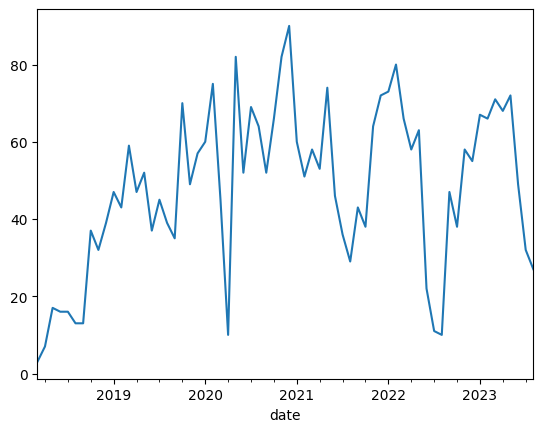

In [21]:
data[data['station_key'] == 'alex'].resample('m')['station_key'].count().plot()

<Axes: xlabel='date'>

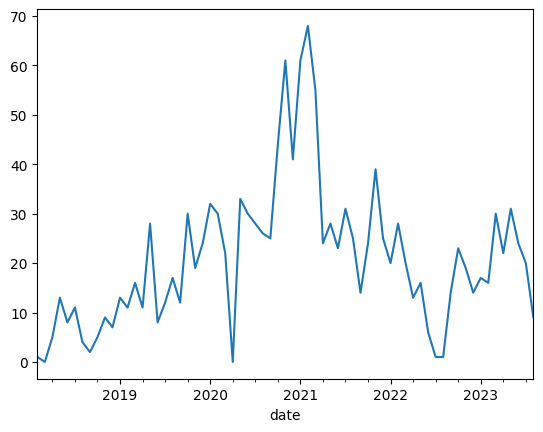

In [22]:
data[data['station_key'] == 'zoo'].resample('m')['station_key'].count().plot()

<Axes: xlabel='date'>

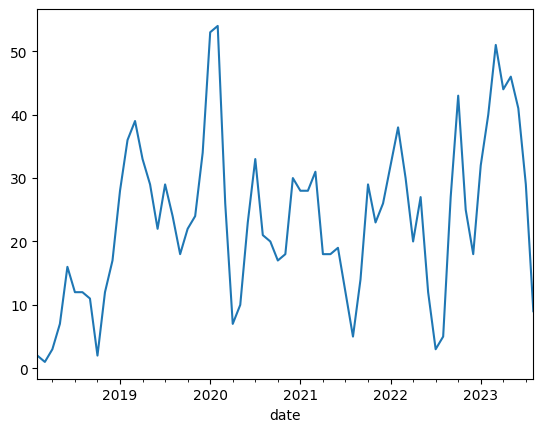

In [23]:
data[data['station_key'] == 'kotti'].resample('m')['station_key'].count().plot()

<Axes: xlabel='date'>

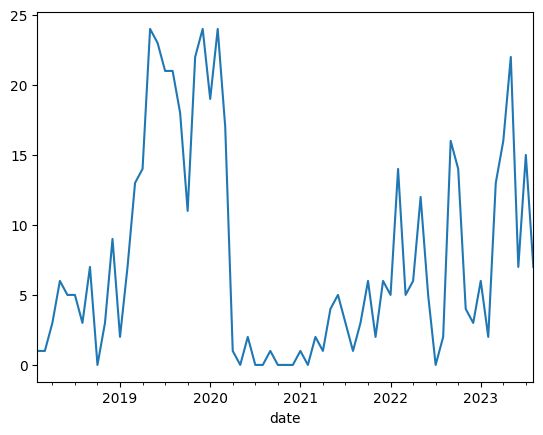

In [24]:
data[data['station_key'] == 'goerli'].resample('m')['station_key'].count().plot()

<Axes: xlabel='date'>

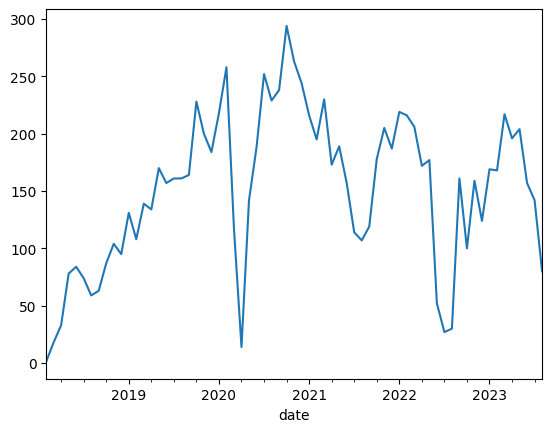

In [25]:
data[data['area'] == 'Mitte'].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

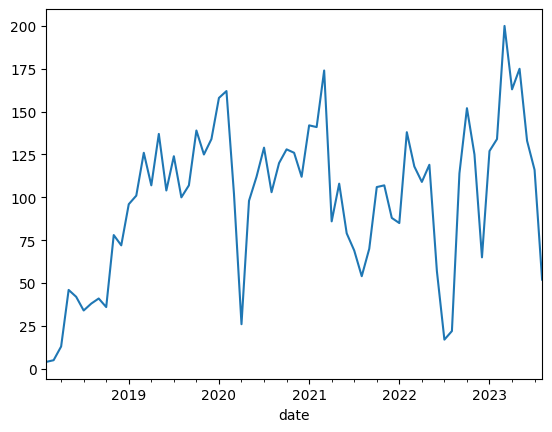

In [26]:
data[data['area'] == 'Kreuzberg'].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

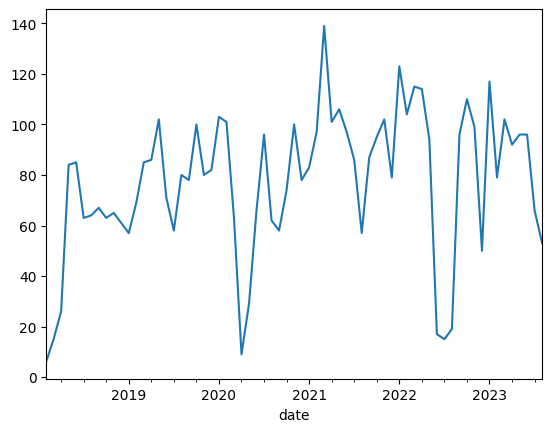

In [27]:
data[data['area'] == 'Friedrichshain'].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

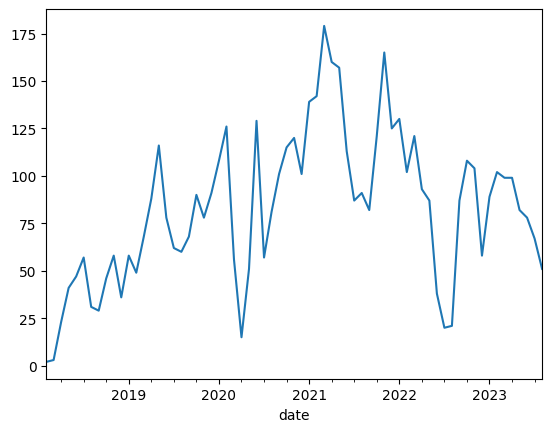

In [28]:
data[data['area'] == 'Neukölln'].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

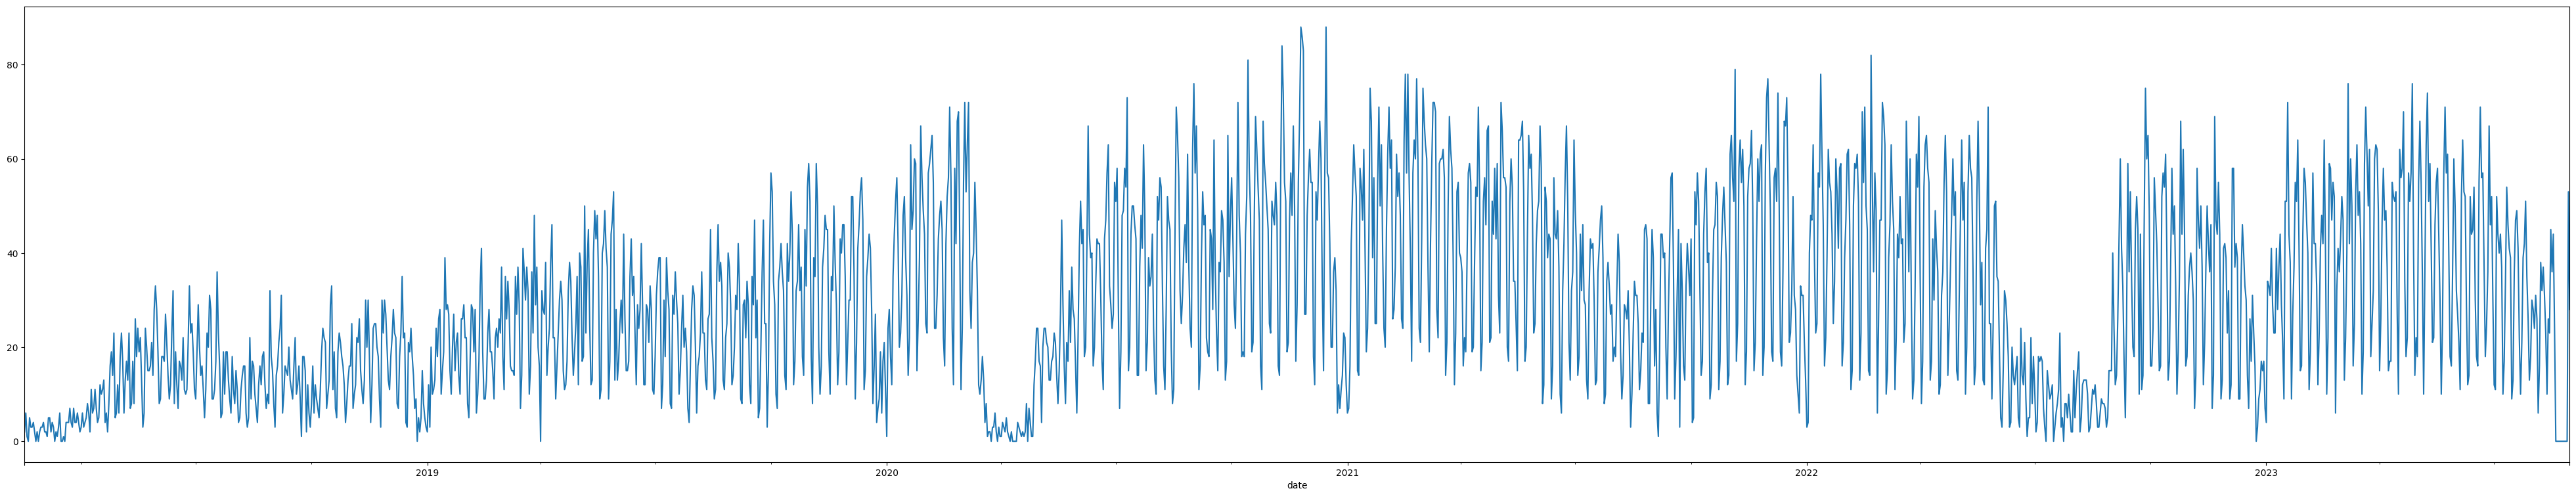

In [29]:
plt.figure(figsize=(50,9))
data.resample('d')['station_key'].count().plot()

## Resampling attempts

In [30]:
hourly_controls = data.resample('h')['station_key'].count()

In [31]:
hourly_controls

date
2018-02-15 12:00:00    1
2018-02-15 13:00:00    0
2018-02-15 14:00:00    0
2018-02-15 15:00:00    0
2018-02-15 16:00:00    0
                      ..
2023-08-30 08:00:00    2
2023-08-30 09:00:00    5
2023-08-30 10:00:00    4
2023-08-30 11:00:00    7
2023-08-30 12:00:00    2
Freq: H, Name: station_key, Length: 48529, dtype: int64

In [32]:
daily_controls = data.resample('d')['station_key'].count()

<Axes: xlabel='date'>

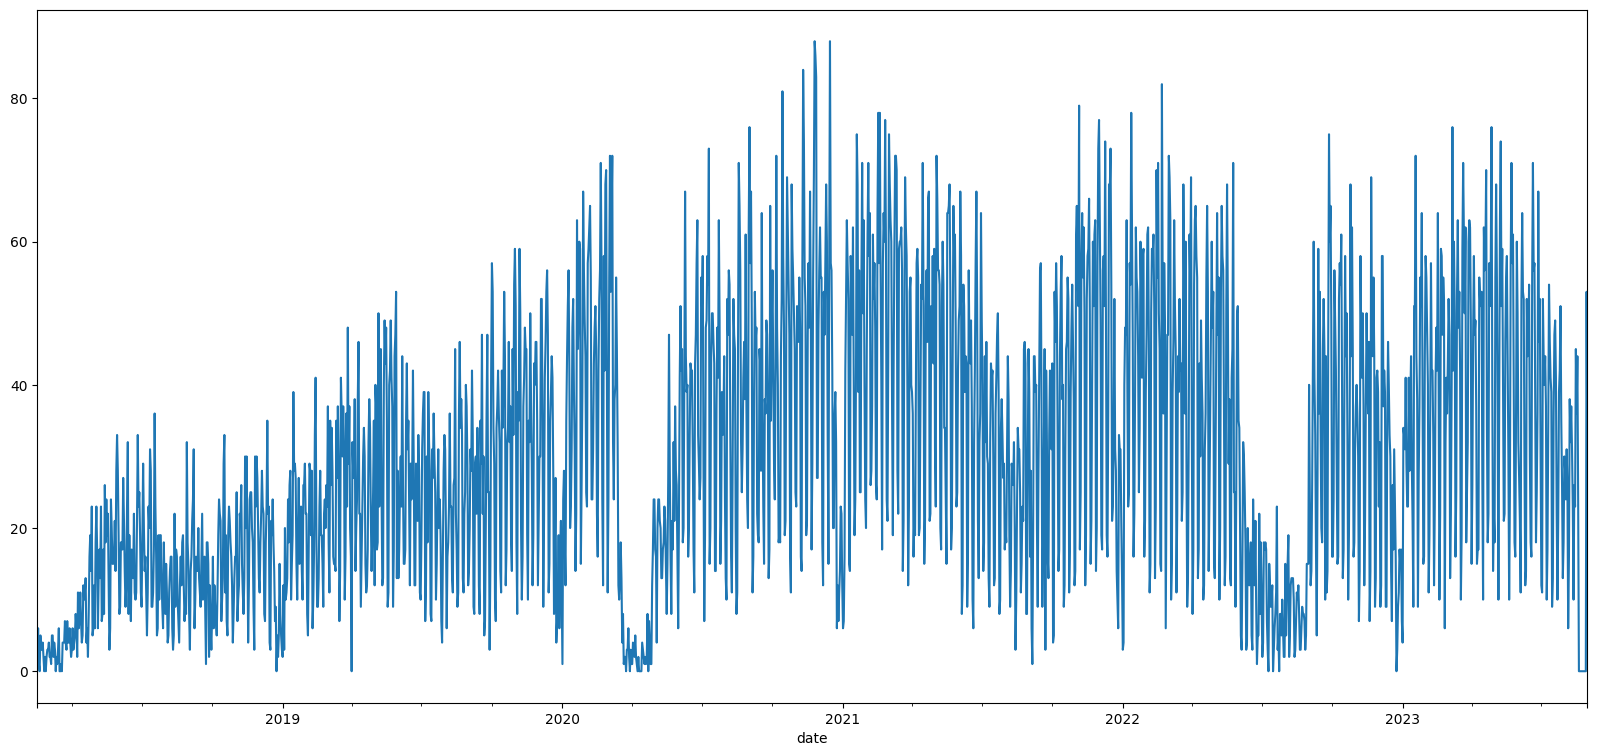

In [33]:
plt.figure(figsize=(20,9))
daily_controls.plot()

In [34]:
monthly_controls = data.resample('m')['station_key'].count()

<Axes: xlabel='date'>

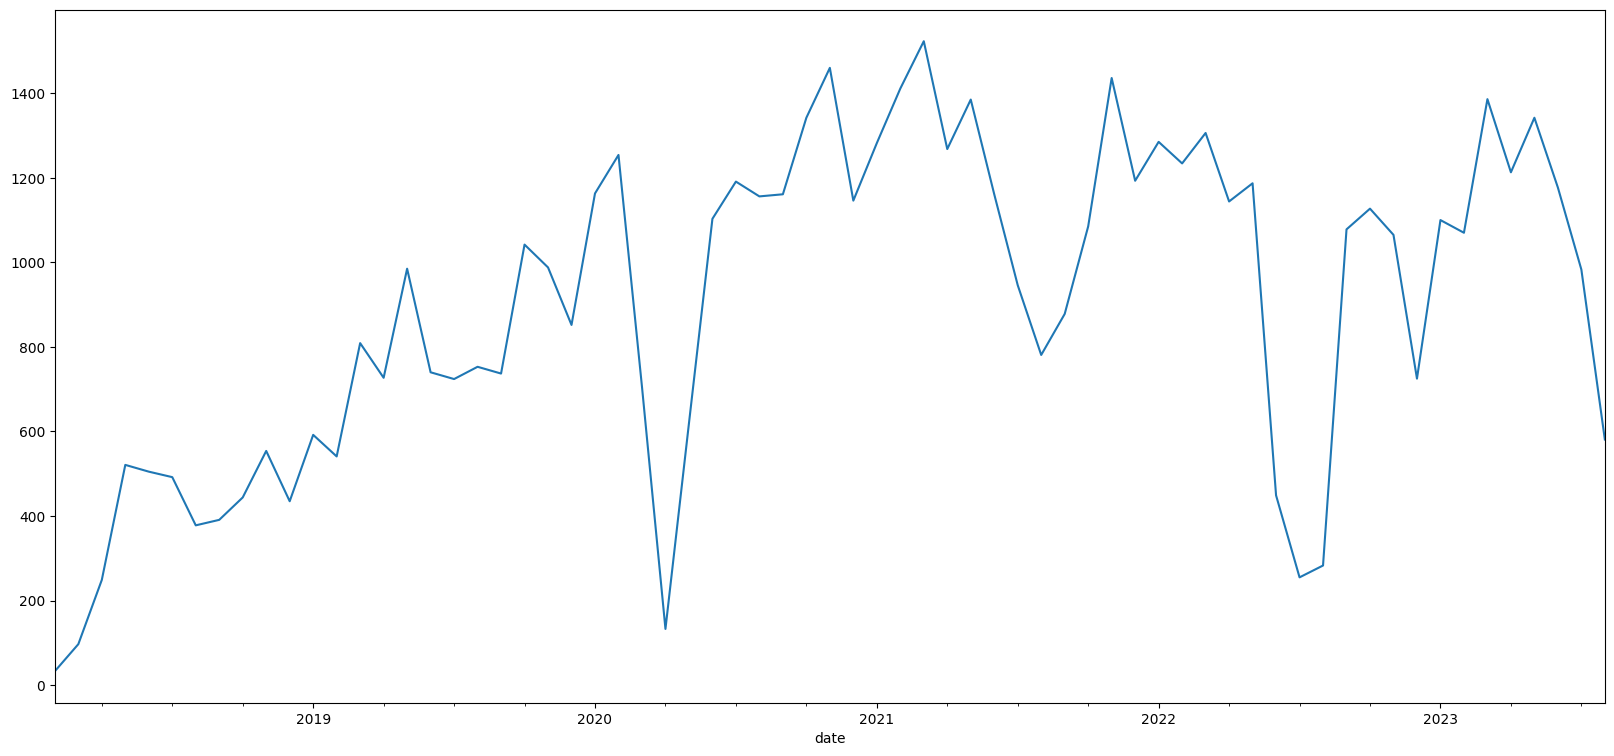

In [35]:
plt.figure(figsize=(20,9))
monthly_controls.plot()

In [36]:
yearly_controls = data.resample('y')['station_key'].count()

<Axes: xlabel='date'>

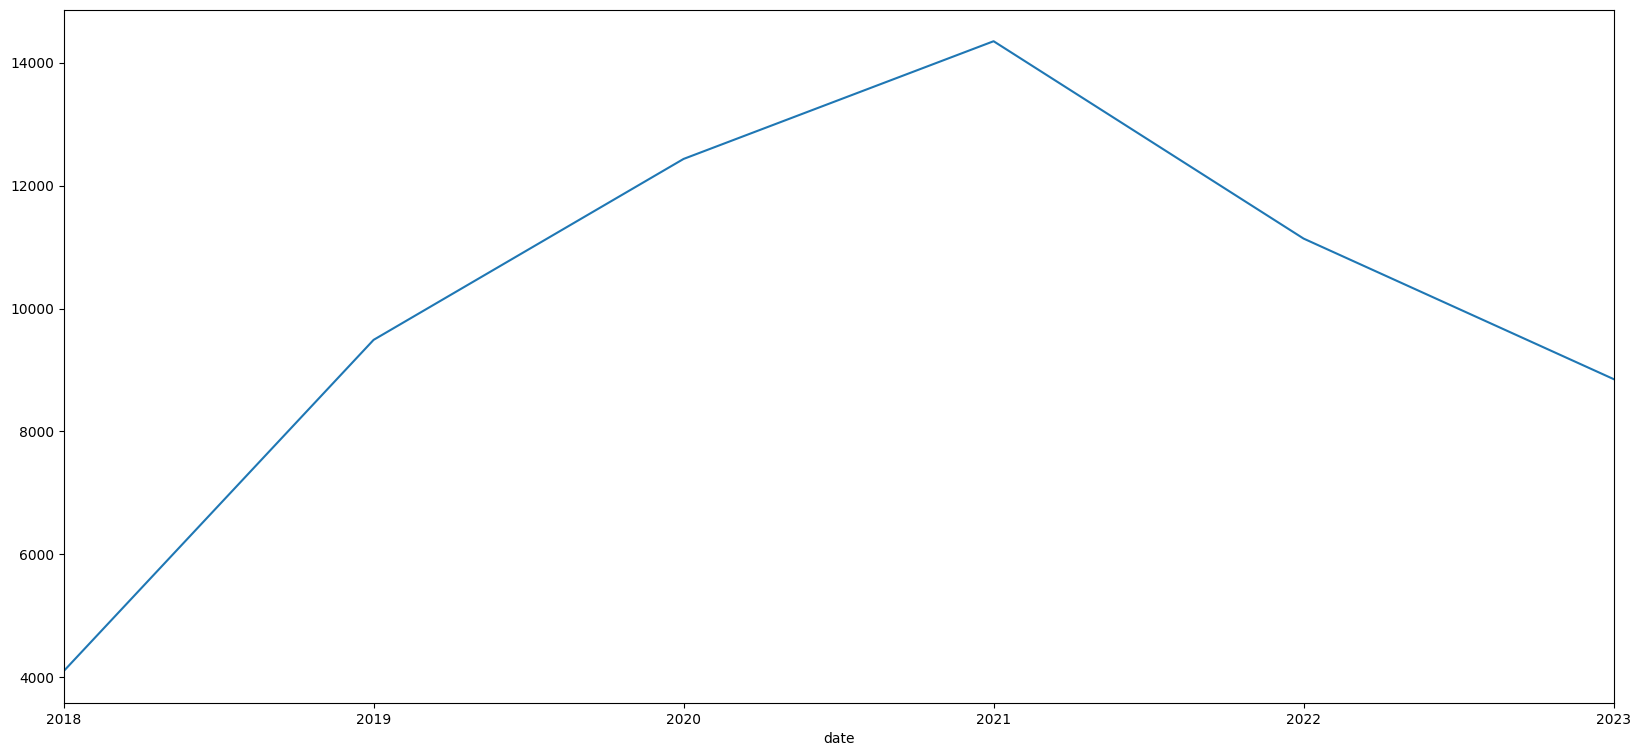

In [37]:
plt.figure(figsize=(20,9))
yearly_controls.plot()

<Axes: xlabel='date'>

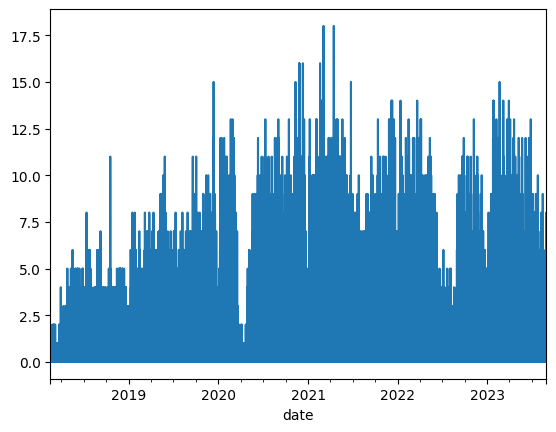

In [38]:
data.resample('h')['station_key'].count().plot()

In [39]:
(data.resample('h')['station_key'].count() == 0).sum()

27294

In [40]:
data.resample('h')['station_key'].count().shape

(48529,)

In [41]:
data

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour
date,,,,,,,,,,,
2018-02-15 12:03:00,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,2018,February,Thursday,12
2018-02-15 18:44:00,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,2018,February,Thursday,18
2018-02-16 07:39:00,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,2018,February,Friday,7
2018-02-16 12:12:00,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,2018,February,Friday,12
2018-02-16 14:31:00,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2018,February,Friday,14
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 11:35:00,kleistpark,bus kleistpark m48 m85 106 187 204,Kleistpark,U7,Schöneberg,52.490556,13.360278,2023,August,Wednesday,11
2023-08-30 11:55:00,nordbahnhof,nordbahnhof tram grad m10 draussen station zi...,Nordbahnhof,"S1, S2, S25, S26",Mitte,52.531944,13.387778,2023,August,Wednesday,11
2023-08-30 11:55:00,bayerischer platz,u7 bayrischer platz richtung spandau kontrolliert,Bayerischer Platz,"U4, U7",Schöneberg,52.488611,13.340000,2023,August,Wednesday,11


# Testing predictions for lines

In [42]:
from ticket_control.fuzz_flow import create_station_to_line_df

[nltk_data] Downloading package punkt to /Users/annushkak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annushkak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/Users/annushkak/code/akinml/ticket-control-bvg/data


In [43]:
data['keys'] = data['station_key']

In [44]:
line_to_station = create_station_to_line_df(data)

In [45]:
line_to_station

,station_key,line
0,wildau,S46
1,erkner,S3
2,hellersdorf,U5
3,zoo,U2
4,zoo,U9
...,...,...
131813,augsburger str,U3
148389,alt tempelhof,U6
167238,muehlenbeck moenchmuehle,S8
175187,osthafen,U1


In [46]:
u1 = list(line_to_station[line_to_station['line'] == 'U1']['station_key'].unique())
u2 = list(line_to_station[line_to_station['line'] == 'U2']['station_key'].unique())
u3 = list(line_to_station[line_to_station['line'] == 'U3']['station_key'].unique())
u4 = list(line_to_station[line_to_station['line'] == 'U4']['station_key'].unique())
u5 = list(line_to_station[line_to_station['line'] == 'U5']['station_key'].unique())
u6 = list(line_to_station[line_to_station['line'] == 'U6']['station_key'].unique())
u7 = list(line_to_station[line_to_station['line'] == 'U7']['station_key'].unique())
u8 = list(line_to_station[line_to_station['line'] == 'U8']['station_key'].unique())
u9 = list(line_to_station[line_to_station['line'] == 'U9']['station_key'].unique())

In [48]:
#data["U7"] = data[data['keys'].isin(u7)]

In [49]:
data[data['keys'].isin(u7)].sort_values(by='date')

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour,keys
date,,,,,,,,,,,,
2018-02-19 11:13:00,jungfernheide,s42 jungefernheide,Jungfernheide,"U7, U7, S41, S42",Charlottenburg,52.530556,13.300139,2018,February,Monday,11,jungfernheide
2018-02-19 18:53:00,jungfernheide,ringbahn 41 gleich jungfernheide drei stueck,Jungfernheide,"U7, U7, S41, S42",Charlottenburg,52.530556,13.300139,2018,February,Monday,18,jungfernheide
2018-03-01 14:44:00,mehringdamm,u mehringdamm gerade u7 gestiegen 4 typen gesehen,Mehringdamm,"U6, U7",Kreuzberg,52.494444,13.388611,2018,March,Thursday,14,mehringdamm
2018-03-02 08:44:00,mierendorffplatz,grosskontrolle mariendorffplatz u7,Mierendorffplatz,U7,Charlottenburg,52.526667,13.305000,2018,March,Friday,8,mierendorffplatz
2018-03-04 14:34:00,berliner str,sonderfall rasse ticketficker einzelexemplar m...,Berliner Straße,"U7, U9",Wilmersdorf,52.487222,13.330833,2018,March,Sunday,14,berliner str
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 10:49:00,hermannplatz,kontrolle u7 aktuell hermannplatz schoenleins...,Hermannplatz,"U7, U8",Neukölln,52.487222,13.424722,2023,August,Wednesday,10,hermannplatz
2023-08-30 11:05:00,neukoelln,s47 2 traegt weissen pullover weisse cap jog...,Neukölln,"U7, S41, S42, S45, S46, S47",Neukölln,52.469444,13.442222,2023,August,Wednesday,11,neukoelln
2023-08-30 11:35:00,kleistpark,bus kleistpark m48 m85 106 187 204,Kleistpark,U7,Schöneberg,52.490556,13.360278,2023,August,Wednesday,11,kleistpark


<Axes: xlabel='date'>

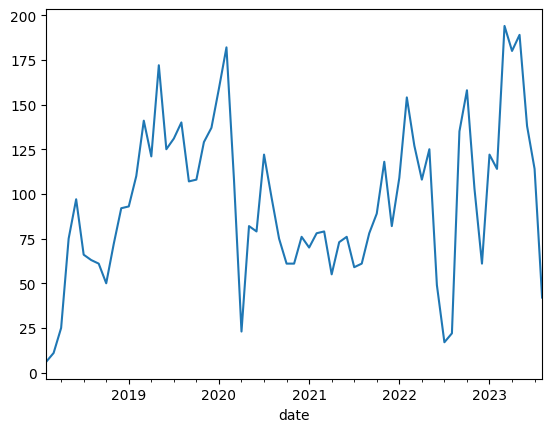

In [50]:
data[data['keys'].isin(u1)].resample('m')['station_key'].count().plot()

<Axes: xlabel='date'>

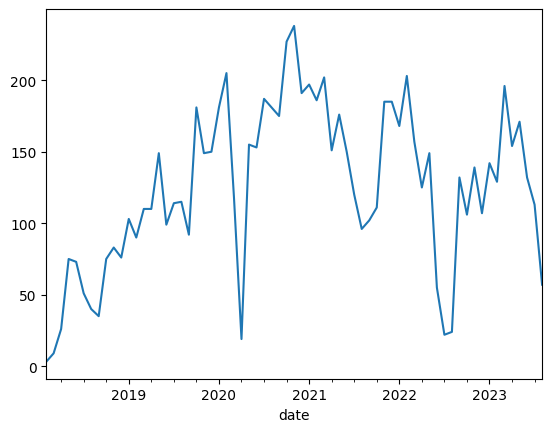

In [51]:
data[data['keys'].isin(u2)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

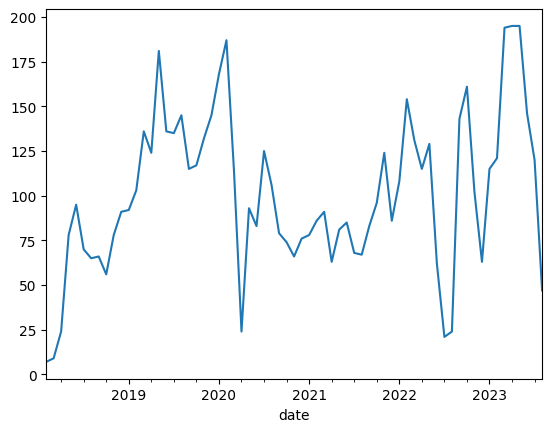

In [52]:
data[data['keys'].isin(u3)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

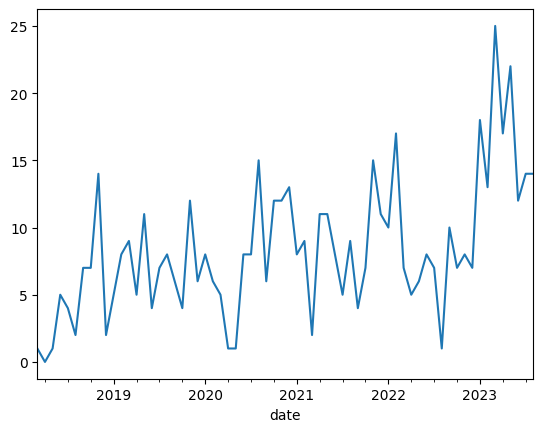

In [53]:
data[data['keys'].isin(u4)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

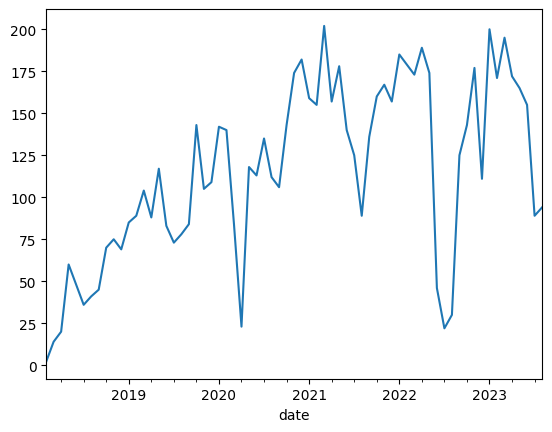

In [54]:
data[data['keys'].isin(u5)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

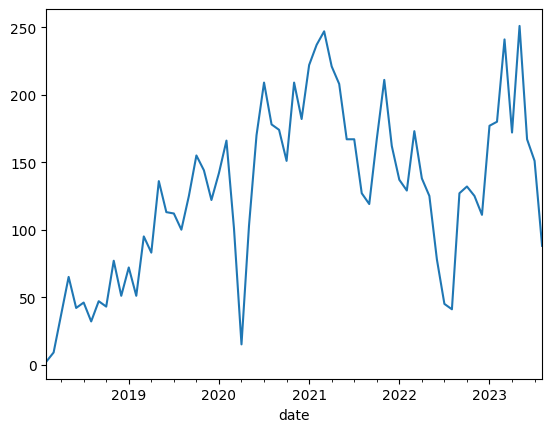

In [55]:
data[data['keys'].isin(u6)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

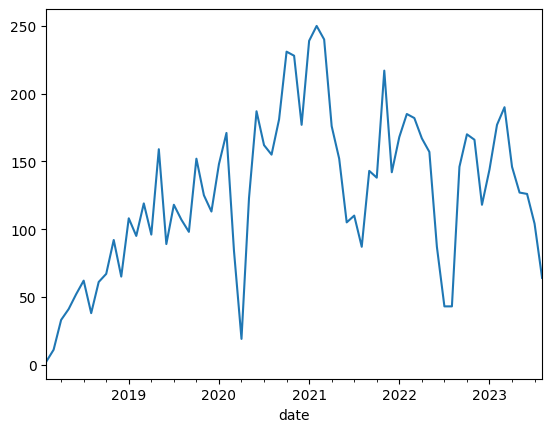

In [56]:
data[data['keys'].isin(u7)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

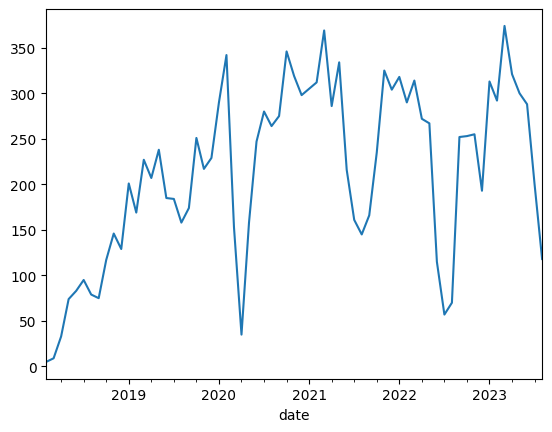

In [57]:
data[data['keys'].isin(u8)].resample('m')['area'].count().plot()

<Axes: xlabel='date'>

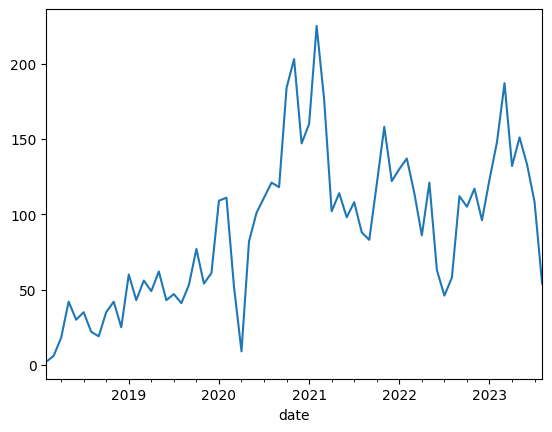

In [58]:
data[data['keys'].isin(u9)].resample('m')['area'].count().plot()

# Modelling

In [59]:
data

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour,keys
date,,,,,,,,,,,,
2018-02-15 12:03:00,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,2018,February,Thursday,12,wildau
2018-02-15 18:44:00,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,2018,February,Thursday,18,erkner
2018-02-16 07:39:00,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,2018,February,Friday,7,hellersdorf
2018-02-16 12:12:00,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,2018,February,Friday,12,zoo
2018-02-16 14:31:00,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2018,February,Friday,14,beusselstr
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 11:35:00,kleistpark,bus kleistpark m48 m85 106 187 204,Kleistpark,U7,Schöneberg,52.490556,13.360278,2023,August,Wednesday,11,kleistpark
2023-08-30 11:55:00,nordbahnhof,nordbahnhof tram grad m10 draussen station zi...,Nordbahnhof,"S1, S2, S25, S26",Mitte,52.531944,13.387778,2023,August,Wednesday,11,nordbahnhof
2023-08-30 11:55:00,bayerischer platz,u7 bayrischer platz richtung spandau kontrolliert,Bayerischer Platz,"U4, U7",Schöneberg,52.488611,13.340000,2023,August,Wednesday,11,bayerischer platz


In [60]:
hourly_controls_m = data[["station_key", "station name", "lines", "area"]].resample('h')['station_key'].count()

In [61]:
!pip install statsmodels

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
hourly_controls_m

date
2018-02-15 12:00:00    1
2018-02-15 13:00:00    0
2018-02-15 14:00:00    0
2018-02-15 15:00:00    0
2018-02-15 16:00:00    0
                      ..
2023-08-30 08:00:00    2
2023-08-30 09:00:00    5
2023-08-30 10:00:00    4
2023-08-30 11:00:00    7
2023-08-30 12:00:00    2
Freq: H, Name: station_key, Length: 48529, dtype: int64

In [64]:
adfuller(hourly_controls_m)

(-21.607033513500625,
 0.0,
 54,
 48474,
 {'1%': -3.4304849103916024,
  '5%': -2.86159962758103,
  '10%': -2.5668017377965215},
 167294.60800832522)

In [65]:
adfuller(hourly_controls_m)[1]

0.0

In [66]:
#ARIMA p and q > correlation and autocorrelation
# optional of time series

In [67]:
#from statsmodels.tsa.stattools import adfuller
#check for seasonality

#adfuller(data.value)[1]  # p-value

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [70]:
areas = list(data["area"].unique())

In [71]:
areas

['Wildau',
 'Erkner',
 'Hellersdorf',
 'Charlottenburg',
 'Moabit',
 'Karlshorst',
 'Gesundbrunnen',
 'Friedrichshain',
 'Grünau',
 'PrenzlauerBerg',
 'Neukölln',
 'Wedding',
 'Tegel',
 'Kreuzberg',
 'Nikolassee',
 'Dahlem',
 'Mitte',
 'Pankow',
 'Reinickendorf',
 'Wilmersdorf',
 'Halensee',
 'Kaulsdorf',
 'Tempelhof',
 'Buch',
 'Hansaviertel',
 'Schöneberg',
 'Marzahn',
 'Gropiusstadt',
 'Oranienburg',
 'Blankenburg',
 'Panketal',
 'BernaubeiBerlin',
 'Rummelsburg',
 'Friedrichshagen',
 'Wittenau',
 'Wannsee',
 'Spandau',
 'Grunewald',
 'Lichtenberg',
 'Rudow',
 'Alt-Treptow',
 'Telt',
 'Prenzlauer Berg',
 'Niederschöneweide',
 'Lichterfelde',
 'Köpenick',
 'Neu-Hohenschönhausen',
 'Altglienicke',
 'Westend',
 'Babelsberg',
 'Zehlendorf',
 'Britz',
 'Frohnau',
 'NeuenhagenbeiBerlin',
 'Mariendorf',
 'KönigsWusterhausen',
 'Berlin-Marzahn',
 'Steglitz',
 'HohenNeuendorf',
 'Adlershof',
 'Hennigsdorf',
 'Friedenau',
 'Biesdorf',
 'Charlottenburg-Nord',
 'Dahlwitz-Hoppegarten',
 'Lichten

In [72]:
areas_dict = {}

In [73]:
num = 1
for ar in areas:
    areas_dict[ar] = num
    num = num + 1
    

In [74]:
areas_dict

{'Wildau': 1,
 'Erkner': 2,
 'Hellersdorf': 3,
 'Charlottenburg': 4,
 'Moabit': 5,
 'Karlshorst': 6,
 'Gesundbrunnen': 7,
 'Friedrichshain': 8,
 'Grünau': 9,
 'PrenzlauerBerg': 10,
 'Neukölln': 11,
 'Wedding': 12,
 'Tegel': 13,
 'Kreuzberg': 14,
 'Nikolassee': 15,
 'Dahlem': 16,
 'Mitte': 17,
 'Pankow': 18,
 'Reinickendorf': 19,
 'Wilmersdorf': 20,
 'Halensee': 21,
 'Kaulsdorf': 22,
 'Tempelhof': 23,
 'Buch': 24,
 'Hansaviertel': 25,
 'Schöneberg': 26,
 'Marzahn': 27,
 'Gropiusstadt': 28,
 'Oranienburg': 29,
 'Blankenburg': 30,
 'Panketal': 31,
 'BernaubeiBerlin': 32,
 'Rummelsburg': 33,
 'Friedrichshagen': 34,
 'Wittenau': 35,
 'Wannsee': 36,
 'Spandau': 37,
 'Grunewald': 38,
 'Lichtenberg': 39,
 'Rudow': 40,
 'Alt-Treptow': 41,
 'Telt': 42,
 'Prenzlauer Berg': 43,
 'Niederschöneweide': 44,
 'Lichterfelde': 45,
 'Köpenick': 46,
 'Neu-Hohenschönhausen': 47,
 'Altglienicke': 48,
 'Westend': 49,
 'Babelsberg': 50,
 'Zehlendorf': 51,
 'Britz': 52,
 'Frohnau': 53,
 'NeuenhagenbeiBerlin': 5

In [75]:
data["area"].map(areas_dict)

date
2018-02-15 12:03:00     1
2018-02-15 18:44:00     2
2018-02-16 07:39:00     3
2018-02-16 12:12:00     4
2018-02-16 14:31:00     5
                       ..
2023-08-30 11:35:00    26
2023-08-30 11:55:00    17
2023-08-30 11:55:00    26
2023-08-30 12:00:00    11
2023-08-30 12:01:00    20
Name: area, Length: 60362, dtype: int64

In [79]:
#area_times = pd.DataFrame(data["date"])
area_times = pd.DataFrame()
area_times["date"] = data.index

In [80]:
area_times["area_code"] = data["area"].map(areas_dict)

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
area_times = area_times.set_index("date")

In [ ]:
area_times

In [ ]:
plt.figure(figsize=(50,9))
area_times.resample('h')['area_code'].plot()

In [ ]:
plt.figure(figsize=(50,9))
data.set_index('date').resample('h')['area'].count().plot()

In [ ]:
plt.figure(figsize=(50,9))
plt.scatterplot(area_times['area_code'])

In [ ]:
data